In [1]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup 
import urllib.request
import warnings 
warnings.filterwarnings('ignore')
web = 'http://www.sports-reference.com/olympics/sports/'
req = urllib.request.Request(web)
page = urllib.request.urlopen(req)
soup = BeautifulSoup(page,'lxml')

In [2]:
table = soup.find("div",{"id":"div_sports"})
print(table)

<div class="table_container p402_hide" id="div_sports">
<table class="sortable stats_table" id="sports">
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr class="" valign="top">
<th align="right" class="ranker sort_default_asc show_partial_when_sorting" data-stat="ranker" tip="Rank">Rk</th>
<th align="left" class="tooltip sort_default_asc" data-stat="sport">Sport</th>
<th align="left" class="tooltip sort_default_asc" data-stat="season">Season</th>
<th align="right" class="tooltip" data-stat="participants">Participants</th>
<th align="right" class="tooltip" data-stat="participants_men">Men</th>
<th align="right" class="tooltip" data-stat="participants_women">Women</th>
<th align="right" class="tooltip" data-stat="countries">Countries</th>
<th align="right" class="tooltip" data-stat="editions">Editions</th>
<th align="right" class="tooltip" data-stat="events">Events</th>
<th align="left" class="tooltip" data-stat="top_medalists">Top Medalist(s)

In [3]:
cells = []
for row in table.find_all("tr"):
    result = row.find_all("td")
    if len(result) == 10:
        dic = {}
        dic["RK"] = result[0].get_text()
        dic["Sport"] = result[1].get_text()
        dic["Season"] = result[2].get_text()
        dic["Participants"] = result[3].get_text()
        dic["Men"] = result[4].get_text()
        dic["Women"] = result[5].get_text()
        dic["Countries"] = result[6].get_text()
        dic["Editions"] = result[7].get_text()
        dic["Events"] = result[8].get_text()
        dic["Top_medalists"] = result[9].get_text()
        cells.append(dic)

In [4]:
data = pd.DataFrame(cells)

In [5]:
data

,RK,Sport,Season,Participants,Men,Women,Countries,Editions,Events,Top_medalists
0,1,Aeronautics,Summer,1,1,0,1,1,1,Hermann Schreiber (1 medal)
1,2,Alpine Skiing,Winter,"2,735","1,739",996,101,19,10,Kjetil AndrÃ© Aamodt (8 medals)
2,3,Alpinism,Summer,25,24,1,6,3,1,25 athletes with 1 medal
3,4,Archery,Summer,"1,113",613,500,98,16,29,Hubert Van Innis (10 medals)
4,5,Art Competitions,Summer,"1,814","1,610",204,51,7,29,Josef Petersen and Alex Walter Diggelmann (3...
...,...,...,...,...,...,...,...,...,...,...
61,62,Tug-Of-War,Summer,160,160,0,13,6,1,3 athletes with 3 medals
62,63,Volleyball,Summer,"2,505","1,374","1,129",48,14,2,4 athletes with 4 medals
63,64,Water Polo,Summer,"2,601","2,262",337,52,27,2,DezsÅ Gyarmati (5 medals)
64,65,Weightlifting,Summer,"2,883","2,526",356,150,26,21,4 athletes with 4 medals


In [6]:
data.to_csv(r'sports.txt', header = None, index = None, sep = ',',mode = 'a',encoding = 'utf-8')

In [7]:
data['Participants'] = data['Participants'].apply(lambda st: int(st.replace(',','')))

In [8]:
summer_df = data.sort_values(by='Participants',ascending = False)[data['Season']=='Summer']

In [9]:
summer_df

,RK,Sport,Season,Participants,Men,Women,Countries,Editions,Events,Top_medalists
5,6,Athletics,Summer,22074,"15,541","6,527",227,29,83,Paavo Nurmi (12 medals)
54,55,Swimming,Summer,8765,"5,142","3,620",201,29,55,Michael Phelps (28 medals)
43,44,Rowing,Summer,7689,"6,204","1,483",101,28,25,Elisabeta Oleniuc-LipÄ (8 medals)
24,25,Football,Summer,6177,"5,427",734,92,27,2,Christie Pearce-Rampone (4 medals)
19,20,Cycling,Summer,5819,"5,104",714,145,29,44,Bradley Wiggins (8 medals)
13,14,Boxing,Summer,5262,"5,197",65,175,25,15,9 athletes with 3 medals
65,66,Wrestling,Summer,4988,"4,766",222,131,28,30,&nbsp Wilfried Dietrich (5 medals)
47,48,Shooting,Summer,4882,"4,144",737,150,27,83,Carl Osburn (11 medals)
46,47,Sailing,Summer,4480,"3,850",629,120,26,38,3 athletes with 5 medals
27,28,Gymnastics,Summer,4135,"2,636","1,499",93,29,27,Larysa Latynina (18 medals)


In [10]:
# Athletics
years =list(range(1896,2020,4))[::-1]
URLS = []
for i in years:
    url = "https://www.sports-reference.com/olympics/summer/"+str(i)+"/ATH/"
    URLS.append(url)

In [11]:
URLS

['https://www.sports-reference.com/olympics/summer/2016/ATH/',
 'https://www.sports-reference.com/olympics/summer/2012/ATH/',
 'https://www.sports-reference.com/olympics/summer/2008/ATH/',
 'https://www.sports-reference.com/olympics/summer/2004/ATH/',
 'https://www.sports-reference.com/olympics/summer/2000/ATH/',
 'https://www.sports-reference.com/olympics/summer/1996/ATH/',
 'https://www.sports-reference.com/olympics/summer/1992/ATH/',
 'https://www.sports-reference.com/olympics/summer/1988/ATH/',
 'https://www.sports-reference.com/olympics/summer/1984/ATH/',
 'https://www.sports-reference.com/olympics/summer/1980/ATH/',
 'https://www.sports-reference.com/olympics/summer/1976/ATH/',
 'https://www.sports-reference.com/olympics/summer/1972/ATH/',
 'https://www.sports-reference.com/olympics/summer/1968/ATH/',
 'https://www.sports-reference.com/olympics/summer/1964/ATH/',
 'https://www.sports-reference.com/olympics/summer/1960/ATH/',
 'https://www.sports-reference.com/olympics/summer/1956

In [12]:
import importlib,sys 
importlib.reload(sys)

<module 'sys' (built-in)>

In [13]:
for i in range(len(URLS)):
    req = urllib.request.Request(URLS[i])
    page = urllib.request.urlopen(req)
    soup = BeautifulSoup(page,"lxml")
    table = soup.find('table',{'class': 'stats_table'})
    A = []
    B = []
    C = []
    D = []
    E = []
    for row in table.find_all('tr'):
        result = row.find_all('td')
        if len(result) == 4:
            A.append(result[0].get_text())
            for tag in [result[1]]:
                try:
                    B.append(tag.img['title'])
                except:
                    pass
            for tag in [result[2]]:
                try:
                    C.append(tag.img['title'])
                except:
                    pass
            for tag in [result[3]]:
                try:
                    D.append(tag.img['title'])
                except:
                    pass
            for tag in result:
                try:
                    E.append(tag.img['title'])
                except:
                    pass
    df = pd.DataFrame(A, columns=['Event'])
    df4 = pd.DataFrame(B, columns=['Gold'])
    df3 = pd.DataFrame(C, columns=['Sliver'])
    df2 = pd.DataFrame(D, columns=['Bronze'])
    df['Gold Score'] = 3*np.ones(len(A))
    df['Sliver Score'] = 2*np.ones(len(A))
    df['Bronze Score'] = 1*np.ones(len(A))
    df = pd.concat([df,df4], axis = 1)
    df = pd.concat([df,df3], axis = 1)
    df = pd.concat([df,df2], axis = 1)
    F = list(set(E))
    Score = []
    Country = F
    for j in range(len(F)):
        Score.append(sum(df.loc[df['Gold'] == F[j]]['Gold Score'])
                 + sum(df.loc[df['Sliver'] == F[j]]['Sliver Score'])
                 + sum(df.loc[df['Bronze'] == F[j]]['Bronze Score']))
    df1 = pd.DataFrame(Country, columns=['Country'])

    df1['Score']=Score
    df1['year'] = np.repeat(years[i], df1.shape[0])
    df1['Percent'] = df1.Score/sum(df1.Score)
    df1.to_csv(r'atheletics.txt', header = None, index = None, sep = ',',
               mode = 'a')

AttributeError: 'NoneType' object has no attribute 'find_all'

In [14]:
atheletics = pd.read_csv('atheletics.txt', header=None)

In [15]:
atheletics.columns = ['Country','Score','Year','Percentage']

In [16]:
top_countries = atheletics.sort_values(by=['Year','Score'], ascending= [False, False])['Country'][:10]

In [17]:
top_countries

6     United States
24            Kenya
2           Jamaica
5          Ethiopia
17            China
18    Great Britain
0      South Africa
19           France
25           Canada
11          Germany
Name: Country, dtype: object

In [18]:
top_atheletics = atheletics[atheletics['Country'].isin(top_countries)]

In [19]:
top_atheletics[:20]

,Country,Score,Year,Percentage
0,South Africa,10.0,2016,0.035461
2,Jamaica,26.0,2016,0.092199
5,Ethiopia,12.0,2016,0.042553
6,United States,68.0,2016,0.241135
11,Germany,7.0,2016,0.024823
17,China,12.0,2016,0.042553
18,Great Britain,12.0,2016,0.042553
19,France,9.0,2016,0.031915
24,Kenya,31.0,2016,0.109929
25,Canada,9.0,2016,0.031915


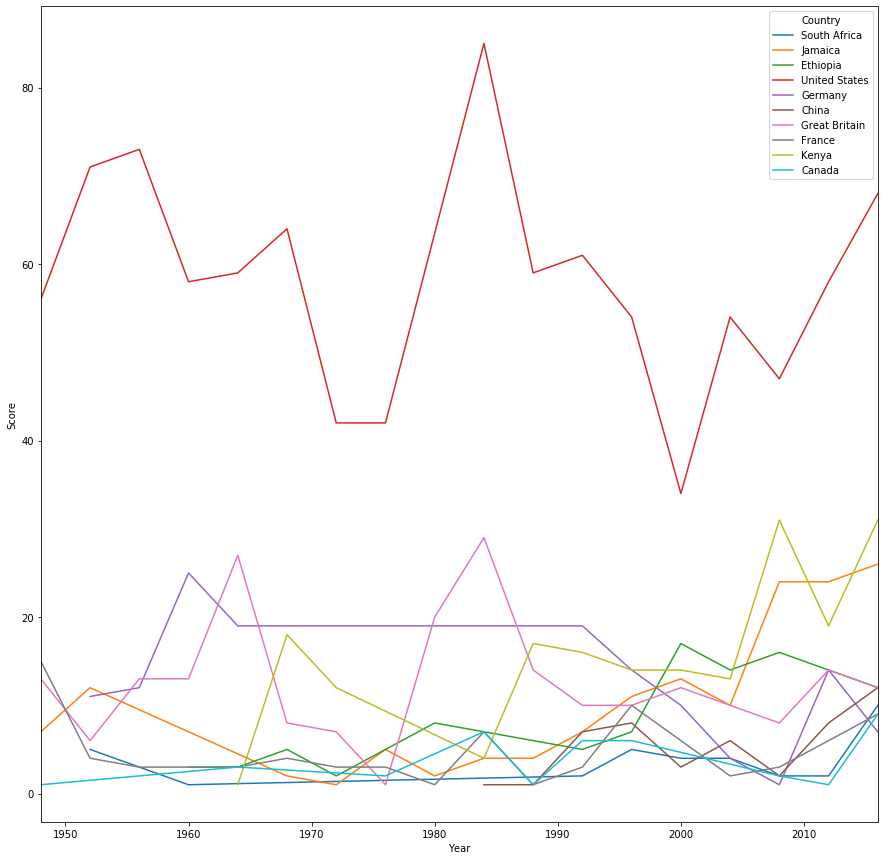

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
f,ax = plt.subplots(figsize = (15,15))
sns.tsplot(top_atheletics, time = 'Year', unit = 'Country', condition = 'Country', value = 'Score',ax = ax)
plt.show()

In [21]:
# Swimming
years =list(range(1896,2020,4))[::-1]
URLS = []
for i in years:
    url = "https://www.sports-reference.com/olympics/summer/"+str(i)+"/SWI/"
    URLS.append(url)

In [22]:
URLS

['https://www.sports-reference.com/olympics/summer/2016/SWI/',
 'https://www.sports-reference.com/olympics/summer/2012/SWI/',
 'https://www.sports-reference.com/olympics/summer/2008/SWI/',
 'https://www.sports-reference.com/olympics/summer/2004/SWI/',
 'https://www.sports-reference.com/olympics/summer/2000/SWI/',
 'https://www.sports-reference.com/olympics/summer/1996/SWI/',
 'https://www.sports-reference.com/olympics/summer/1992/SWI/',
 'https://www.sports-reference.com/olympics/summer/1988/SWI/',
 'https://www.sports-reference.com/olympics/summer/1984/SWI/',
 'https://www.sports-reference.com/olympics/summer/1980/SWI/',
 'https://www.sports-reference.com/olympics/summer/1976/SWI/',
 'https://www.sports-reference.com/olympics/summer/1972/SWI/',
 'https://www.sports-reference.com/olympics/summer/1968/SWI/',
 'https://www.sports-reference.com/olympics/summer/1964/SWI/',
 'https://www.sports-reference.com/olympics/summer/1960/SWI/',
 'https://www.sports-reference.com/olympics/summer/1956

In [23]:
for i in range(len(URLS)):
    req = urllib.request.Request(URLS[i])
    page = urllib.request.urlopen(req)
    soup = BeautifulSoup(page,"lxml")
    table = soup.find('table',{'class': 'stats_table'})
    A = []
    B = []
    C = []
    D = []
    E = []
    for row in table.find_all('tr'):
        result = row.find_all('td')
        if len(result) == 4:
            A.append(result[0].get_text())
            for tag in [result[1]]:
                try:
                    B.append(tag.img['title'])
                except:
                    pass
            for tag in [result[2]]:
                try:
                    C.append(tag.img['title'])
                except:
                    pass
            for tag in [result[3]]:
                try:
                    D.append(tag.img['title'])
                except:
                    pass
            for tag in result:
                try:
                    E.append(tag.img['title'])
                except:
                    pass
    df = pd.DataFrame(A, columns=['Event'])
    df4 = pd.DataFrame(B, columns=['Gold'])
    df3 = pd.DataFrame(C, columns=['Sliver'])
    df2 = pd.DataFrame(D, columns=['Bronze'])
    df['Gold Score'] = 3*np.ones(len(A))
    df['Sliver Score'] = 2*np.ones(len(A))
    df['Bronze Score'] = 1*np.ones(len(A))
    df = pd.concat([df,df4], axis = 1)
    df = pd.concat([df,df3], axis = 1)
    df = pd.concat([df,df2], axis = 1)
    F = list(set(E))
    Score = []
    Country = F
    for j in range(len(F)):
        Score.append(sum(df.loc[df['Gold'] == F[j]]['Gold Score'])
                 + sum(df.loc[df['Sliver'] == F[j]]['Sliver Score'])
                 + sum(df.loc[df['Bronze'] == F[j]]['Bronze Score']))
    df1 = pd.DataFrame(Country, columns=['Country'])

    df1['Score']=Score
    df1['year'] = np.repeat(years[i], df1.shape[0])
    df1['Percent'] = df1.Score/sum(df1.Score)
    df1.to_csv(r'swimming.txt', header = None, index = None, sep = ',',
               mode = 'a')

AttributeError: 'NoneType' object has no attribute 'find_all'

In [24]:
swimming = pd.read_csv('swimming.txt', header=None)

In [25]:
swimming.columns = ['Country','Score','Year','Percentage']

In [26]:
top_countries = swimming.sort_values(by=['Year','Score'], ascending= [False, False])['Country'][:10]

In [27]:
top_countries

3     United States
5         Australia
2             Japan
8     Great Britain
20          Hungary
9             China
12           Canada
0             Italy
6            Sweden
7       Netherlands
Name: Country, dtype: object

In [28]:
top_swimming = swimming[swimming['Country'].isin(top_countries)]

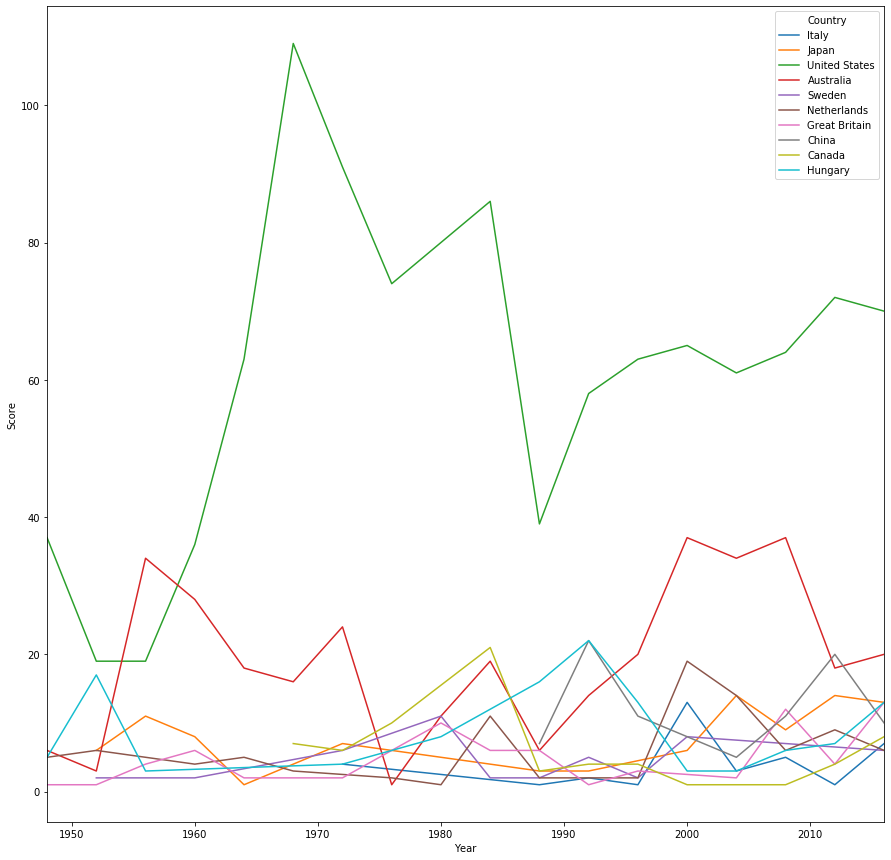

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
f,ax = plt.subplots(figsize = (15,15))
sns.tsplot(top_swimming, time = 'Year', unit = 'Country', condition = 'Country', value = 'Score',ax = ax)
plt.show()